# Fashion MNIST dataset



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
mnist = keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

28 rows in 28 pixels

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train[0,23,23]# one pixel looks like

194

grey-scale value

In [ ]:
#multiple cells look like
x_train[0:]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
np.max(x_train)

255

In [ ]:
np.mean(x_train)

72.94035223214286

In [ ]:
from scipy import stats
stats.describe(y_train)

DescribeResult(nobs=60000, minmax=(0, 9), mean=4.5, variance=8.250137502291704, skewness=0.0, kurtosis=-1.2242424242424244)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_name = ["top","trouser","pullover","dress","coat",
              "sandal","shirt","sneaker","bag","ankle boot"]

**DATA EXPLORATION!!**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

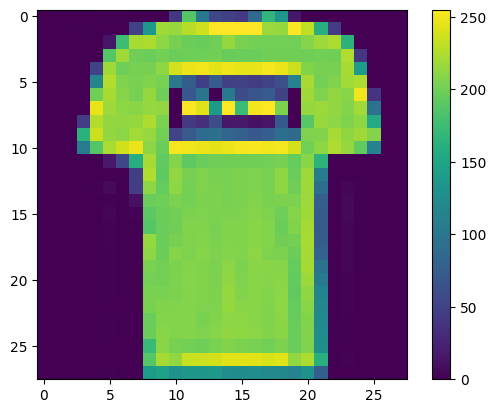

In [ ]:
plt.figure() #for visualising
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train = x_train/255.0

In [ ]:
x_test = x_test/255.0

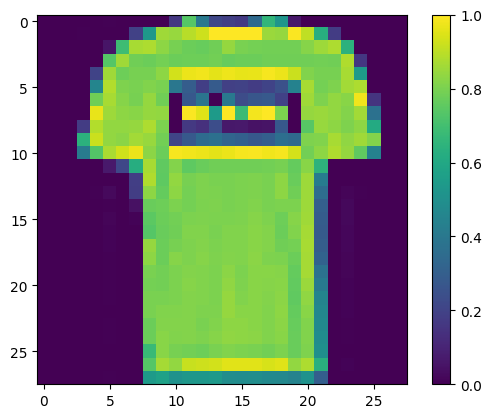

In [ ]:
plt.figure() #now values are down in between 1 and 0 and
plt.imshow(x_train[1]) #ready for neural network
plt.colorbar()

**Building a Machine Learning model with TF 2.0**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = "relu")) #128 neurons
model.add(Dense(10,activation = "softmax"))# 10 classes

Flatten layer transform the formats of the data into 28,28 into 1 dimensional to fit into a next layer.


In [ ]:
model.summary()
#first we transform from 2-d data into 1D
#then we have 128 neuron and multiply by 784 and we get # of parameter
#finally the output with 10 class/key
#we get model with executing more than 10,000

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model compilation
*   Loss Function - minimize error during the training
*   Optimizer - how model is updated based on data thats been the weights of this model applicants updated
*   Metrics



We use here, Sparse categorical cross-entropy. It is used in multi-class classification problems that accepts integer class indices as the true labels instead of one-hot encoded vectors.

Since our y value are from 0-9 instead of 0's and 1 like one - hot encoding. Spare categorical crossentropy is the most appropriate here.

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#updating 10 times thus weights are updating 10 times
#the next is using back propagation it updates the data
model.fit(x_train,y_train,epochs = 1)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2073 - accuracy: 0.9217


In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)# to evaluate the accuracy of the model
print(test_acc)

313/313 - 0s - loss: 0.3817 - accuracy: 0.8687 - 487ms/epoch - 2ms/step
0.8687000274658203


During Training, acc = 0.93
However during testing, acc dropped to 0.883. This is the overfitting of the model.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#y_pred = model.predict_classes(x_test)
y_pred0 = model.predict(x_test)
y_pred = np.argmax(y_pred0,axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.8687

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

# Plotting Learning Curve and Confusion Matrix

In [ ]:
help(model)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequenti

In [ ]:
history = model.fit(x_train,y_train,epochs = 10,batch_size = 10, validation_split = 0.2)

Epoch 1/10
4800/4800 [==============================] - 23s 5ms/step - loss: 0.2802 - accuracy: 0.8966 - val_loss: 0.2767 - val_accuracy: 0.8957
Epoch 2/10
4800/4800 [==============================] - 14s 3ms/step - loss: 0.2594 - accuracy: 0.9020 - val_loss: 0.2739 - val_accuracy: 0.9005
Epoch 3/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.2495 - accuracy: 0.9072 - val_loss: 0.3027 - val_accuracy: 0.8933
Epoch 4/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.2396 - accuracy: 0.9100 - val_loss: 0.2807 - val_accuracy: 0.8991
Epoch 5/10
4800/4800 [==============================] - 14s 3ms/step - loss: 0.2341 - accuracy: 0.9129 - val_loss: 0.2832 - val_accuracy: 0.8995
Epoch 6/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.2255 - accuracy: 0.9150 - val_loss: 0.2833 - val_accuracy: 0.9002
Epoch 7/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.2187 - accuracy: 0.9180 - val_loss: 0.3212 - val_ac

Validation to check whether our model is working or not

Accuracy is more than validation accuracy. That means our model is overfitting!



In [ ]:
history.history #history has history in it

{'loss': [0.2801637649536133,
  0.2593631148338318,
  0.24949558079242706,
  0.23958691954612732,
  0.2341143637895584,
  0.22553636133670807,
  0.21869142353534698,
  0.21177594363689423,
  0.20894373953342438,
  0.2018136829137802],
 'accuracy': [0.8966458439826965,
  0.9020000100135803,
  0.9071875214576721,
  0.9099583625793457,
  0.9128958582878113,
  0.9150416851043701,
  0.9179999828338623,
  0.9202916622161865,
  0.9227291941642761,
  0.9246041774749756],
 'val_loss': [0.27672097086906433,
  0.2738601565361023,
  0.3027336895465851,
  0.2806885540485382,
  0.28317809104919434,
  0.2833459973335266,
  0.32121697068214417,
  0.31153154373168945,
  0.3146190345287323,
  0.2959810793399811],
 'val_accuracy': [0.8957499861717224,
  0.9004999995231628,
  0.8933333158493042,
  0.8990833163261414,
  0.8995000123977661,
  0.9001666903495789,
  0.8884999752044678,
  0.8900833129882812,
  0.8965833187103271,
  0.8980000019073486]}

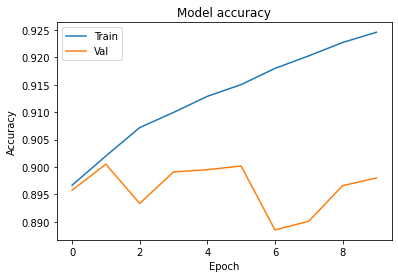

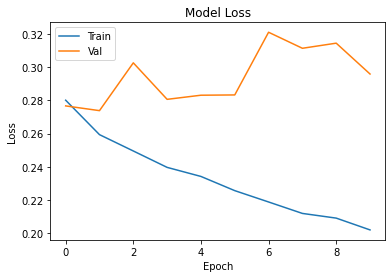

In [ ]:
#Plot training loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'upper left')
plt.show()


#Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'upper left')
plt.show()

# Plot Confusion Matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecb55973a0>)

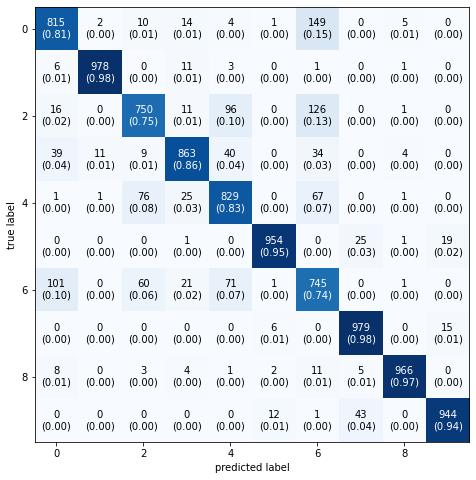

In [ ]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), show_normed = True)